# PH464 Final project (preliminary)

#### Deadline is Friday, December 11 at 11:59pm.

Please submit your work as jupyter notebook on canvas. It is permissible to discuss your project with other students but your submitted work has to be your own. All modeling work should be accompanied by text describing and explaining the work and suitable figures.

## Predicting superconducting transition temperatures from material database.

### Background

We will use materials data for superconducting materials to create machine learning models to predict the superconducting transition temperature of superconducting materials. We will not try to predict the potential of a material to be a superconductor, as this is a question that far exceeds the scope of this class project.

Your project should use as a guide the relevant sections of the paper 
**Machine learning modeling of superconducting critical temperature**
by Stanev et al.

* published: https://www.sciencedirect.com/science/article/pii/S0927025618304877
* arXiv: https://arxiv.org/abs/1709.02727

However, to simplify data collection, we will use the dataset described in the paper
**A Data-Driven Statistical Model for Predicting the Critical Temperature of a Superconductor**
by Kam Hamidieh 

* arXiv https://arxiv.org/abs/1803.10260
* github https://github.com/khamidieh/predict_tc/blob/master/paper_3.pdf

The dataset is available in the github project: https://github.com/khamidieh/predict_tc
This dataset is based in part on the same sources as the Stanev paper but in its final form differs considerably in the choice of variables from the data used in the Stanev paper. Hence you should not expect identical results.


### Part 1 - Read the papers

Read the papers. You are not expected to understand everything in this papers. Reading a paper for the first time requires you to skip over details and extract the most important information for your purposes.

#### Formulate 3 questions and email to the instructor. Due date: Thurday, October 22, 5pm.

### Part 2 - Extract the dataset (optional) and read it into python data structures
The Hamidieh dataset can be downloaded as part of a github project provided by the author: https://github.com/khamidieh/predict_tc .
However the dataset is in a binary format that is not directly accessible from python. Follow the instructions in the github project to extract datafiles that can be imported into python. 

To simplify this step the data is provided in clear text format in two files (canvas for now). What information does each file contain?

### Part 3 - Visualization and exploration of the data

Explore and visualize the dataset. Answer  questions like:How many variables? How many entries? Which elements appear how often? Use the figures in the papers as a guide. At the minimum provide figures of superconducting transition temperature distribution in the dataset. Create seperate plots for entire dataset and the 3 classes of superconductors discussed in the Stanev paper:

- $T_c<10K$. 
- Iron based superconductors, i.e. material composition contains $Fe$.
- HTC superconductors, i.e material composition contains $Cu$ and $O$ in roughly (but not exclusively) in a $1:2$ ratio indicating $Cu$-$O$ planes. Note, that for example $YBa_2Cu_4O_7$ is a HTC superconductor and $4:7$ is roughly $1:2$ in this context. The $Cu$ $O$ ratio can deviate strongly from $1:2$ if oxygen is also present in other layers other than the $Cu$-$O$ planes.
- For each element determine for the compounds that contain it the average and standard deviation of the superconducting transition temperatures. Graph your results (2 figures)
- Plot the superconducting transition temperature against the following properties (one figure each): *mean_atomic_mass*, *range ThermalConductivity*, *range atomic radius*.

### Due date for figures and code to generate the figures is Monday 11/9.

# NOTE: Section 1, 2, and 3 are already completed in sc-part1

In [1]:
# Importing relevant libs/modules 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os 

# Changing dir to better access train.csv and unique_m.csv 
os.chdir("/Users/luke/Desktop/python_project/GitClone/scientific-computing-archive/sci-comp-II/")
print(os.getcwd())


/Users/luke/Desktop/python_project/GitClone/scientific-computing-archive/sci-comp-II


In [2]:
# Reading data
df_t = pd.read_csv("./Week-3/train.csv") 
df_tnew = pd.read_csv("./Week-3/train.csv") 
df_um = pd.read_csv("./Week-3/unique_m.csv")
print(df_t)
print(df_um)

       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787   

### Part 4 - Dimensionality reduction

Apply dimensionalty reduction (for example principle component analysis (PCA)) to the dataset. What can you learn about the data? visualize your results.


Initial check for mean and standard deviaition of the normalized data: 

Mean = -5.477105179050146e-18
Std  =  1.0
______________________________________________________________________


Explained variation per principal components:[0.38992711 0.10393016]

In the process of reducing the dimensions to 2, the explained 
variation shows the % of information retained in each component:

Principal Component 1 = ~38.99% 
Principal Component 2 = ~10.39%

This goes to show that 50.62% of information was lost during the
dimensionality reduction process.

______________________________________________________________________




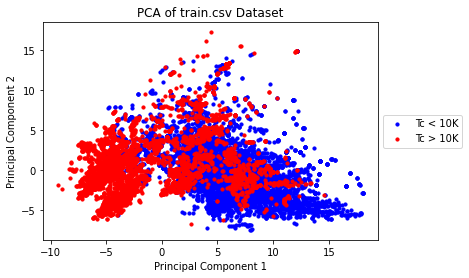

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# Selecting and normalizing the dataset 
x = df_t.loc[:, df_t.columns].values 
x = StandardScaler().fit_transform(x)
print(f'''
Initial check for mean and standard deviaition of the normalized data: 

Mean = {np.mean(x)}
Std  =  {np.std(x)}
______________________________________________________________________
''')

# Beginning process for PCA by projecting the dataset to n components, whereby n can be changed
# Changing n value will require the inclusion of additional 'pc_n' arguments in principal_digits_df 
feat_cols = ['feature' + str(i) for i in range(x.shape[1])]
normalized_digits = pd.DataFrame(x, columns = feat_cols) 
pca_digits = PCA(n_components = 2) # Reducing it to get down to 2 dimensions
principalComponents_digits = pca_digits.fit_transform(x) 
principal_digits_df = pd.DataFrame(data = principalComponents_digits, columns = ['pc1', 'pc2'])

print(f'''
Explained variation per principal components:{pca_digits.explained_variance_ratio_}

In the process of reducing the dimensions to 2, the explained 
variation shows the % of information retained in each component:

Principal Component 1 = ~38.99% 
Principal Component 2 = ~10.39%

This goes to show that {100-38.99-10.39}% of information was lost during the
dimensionality reduction process.

______________________________________________________________________

''')

# Giving datasets a new label related to critical temp, Tc (classification)
# Classification will divide the datasets to something relatable to the Stanev paper on super-conductors 
# Dataset will be divided into 2 groups: 
# 1. Critical Temperature < 10K 
# 2. Critical Temperature > 10K 
df_um['id'] = pd.cut(df_um['critical_temp'],[-np.inf,10,np.inf],labels=['Tc < 10K', 'Tc > 10K'],right=False)
targets = ['Tc < 10K', 'Tc > 10K']
colors = ['b', 'r']

plt.figure()
for targets, colors in zip(targets, colors):
    indiciesToKeep = df_um['id'] == targets
    plt.scatter(principal_digits_df.loc[indiciesToKeep, 'pc1'], principal_digits_df.loc[indiciesToKeep, 'pc2'], c = colors, s = 10, label = targets)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of train.csv Dataset')
plt.show()


### Part 5 - Random Forests

Follow the example of the Stanev paper and apply Random Forest machine learning models to the data to predict the superconducting transition temperature. Use standard techniques discussed in class such as training and test data. Consider using advanced techniques such as cross-validation.

Consider both the entire dataset and the superconductor categories discussed in the Stanev paper (and listed in part 2) 
Discuss your models and use suitable graphs to document your work.

What predictions does your model make for the potential superconducting materials listed in table 6 of the Hamidieh paper? 


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Modifying critical_temp col to an integer to remove continuous label error 
df_tnew['critical_temp'] = df_tnew['critical_temp'].round(0).astype(int)

X = df_tnew 
y = df_tnew['critical_temp']

# Splitting dataset into training and test set
# 70% training and 30% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

# Creating Gaussian Classifier
clff = RandomForestClassifier(n_estimators = 100) 

# Training the model and predicting y with test x 
clff.fit(X_train, y_train)
y_pred = clff.predict(X_test)

# # Getting accuracy value
# print(f'''
# Accuracy: {metrics.accuracy_score(Yy_test, Yy_pred)}

# Classification Report: 

# {metrics.classification_report(y_test, y_pred)}

# Confusion Matrix: 

# {metrics.confusion_matrix(y_test, y_pred, labels=range(digits.target_names.shape[0]))}
# ''')

# # Looking at important features 
# feature_imp = pd.Series(clff.feature_importances_,index=digits.feature_names).sort_values(ascending=False)
# #print(feature_imp)


### Part 6 (optional) - Other  machine learning models

Apply and discuss another machine learning model (discussed in class or directly from sk-learn) to the data. How does it compare to random forests? Why does it perform better (or worse) than random forests?


### Deadline for parts 4 and 5 (optionally 6) is Friday, December 11 at 11:59pm.